<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
None


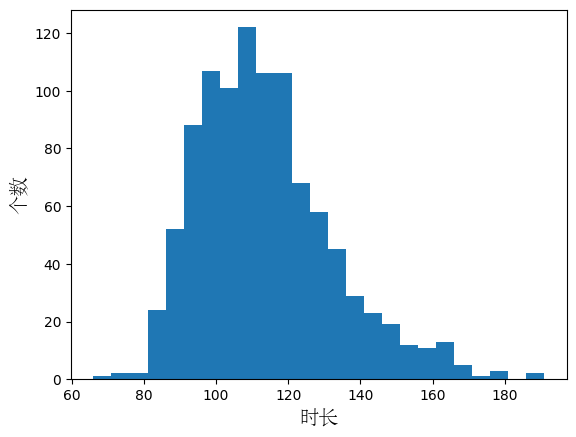

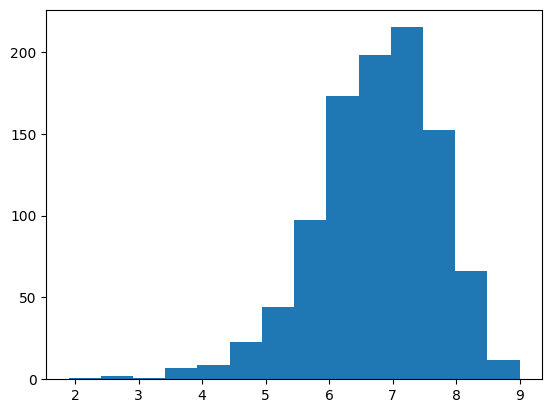

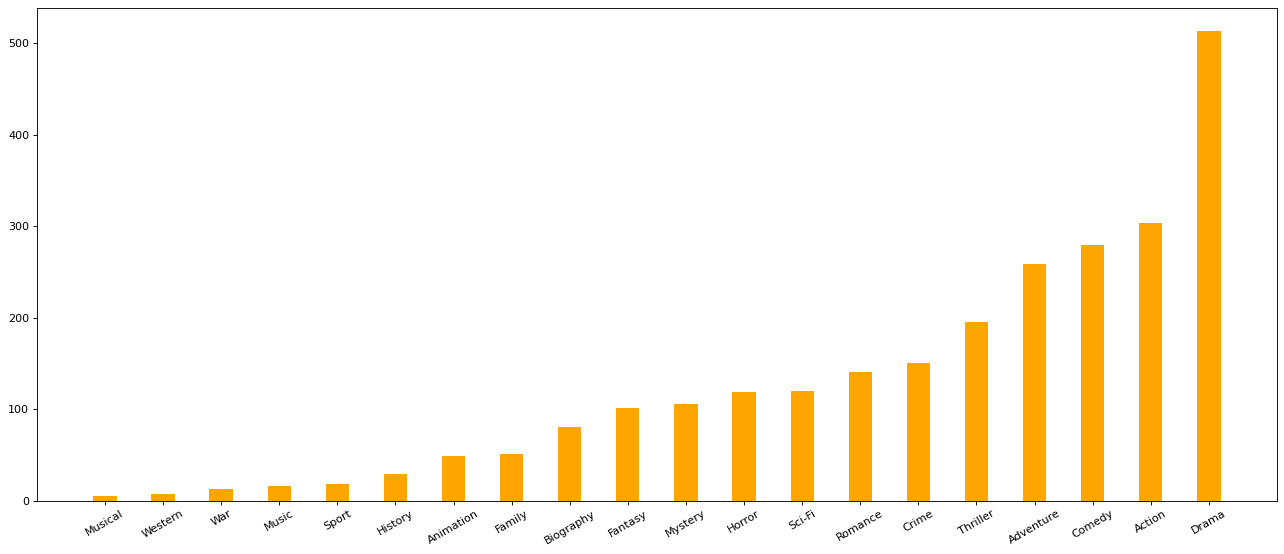

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt,font_manager
# 该文件导演列表有多个，隔开数据，np分隔符，会导致读取的数据与原表不一致
# raw_data = np.loadtxt('IMDB-Movie-Data.csv', delimiter=',',skiprows=1,dtype='int32',usecols=9)

raw_data = pd.read_csv('IMDB-Movie-Data.csv')
# info 数据类型详细简报
print(raw_data.info())
# print(raw_data.head(3))
# print(type(raw_data))     读取的数据是dataframe类型
runtime,rating = raw_data.iloc[:, 7],raw_data.iloc[:, 8]
# runtime = raw_data['Runtime (Minutes)'].values
# 电影时长直方图数据处理
max_rtime = max(runtime)
min_rtime = min(runtime)
my_font = font_manager.FontProperties(fname='C:\Windows\Fonts\STSONG.TTF', size=14)
num_bin = (max_rtime-min_rtime)//5 # 组数
plt.xlabel('时长',fontproperties=my_font)
plt.ylabel('个数',fontproperties=my_font)
plt.hist(runtime,bins=num_bin)
plt.show()
# 电影评分直方图
max_rating = max(rating)
min_rating = min(rating)
bin_counts = int((max_rating-min_rating)//0.5)
plt.hist(rating, bins=bin_counts)
plt.show()
# 题材
Genre_data = raw_data['Genre']
# 每个样本的特征情况
data_list = Genre_data.str.split(',').tolist()
# 二维列表->一维列表，去重
genre_list = list(set([i for j in data_list for i in j]))
# one-hot编码    raw_data.shape[0] 数据多少行（样本个数）  shape[1] 特征个数
# np.zeros(shape,**kwargs)  1000行，12个题材的dataframe
zero_raw_data = pd.DataFrame(np.zeros((raw_data.shape[0], len(genre_list))),columns=genre_list)
for i in range(raw_data.shape[0]):
    zero_raw_data.loc[i, data_list[i]] = 1
genre_count = zero_raw_data.sum(axis=0) # 每个题材的电影数量, series类型
genre_count = genre_count.sort_values() # 排序
_x =genre_count.index
_y = genre_count.values
plt.figure(figsize=(20,8), dpi=80)
plt.bar(range(len(_x)),_y,width=0.4,color='orange')
plt.xticks(range(len(_x)),_x,rotation=30)
plt.show()
